# Task 2/4: Diffusion Maps

In [1]:
import numpy as np
from scipy.spatial import KDTree, distance_matrix
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from diffusion_maps import plot_dataset, diffusion_maps
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting
from sklearn.datasets import make_swiss_roll
from pca import *
import sklearn.manifold as manifold

import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

%reload_ext autoreload
%autoreload 2

D:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
D:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Part One : Compute five eigenfunctions $\phi_l$ associated to the largest eigenvalues $\lambda_l$ with Diffusion Maps, on a periodic data set with N = 1000 points

In [2]:
#create periodic dataset
N = 1000 # Number of points
k = np.arange(1, N + 1) # Array of integers from 1 to N (inclusive)
t_k = 2 * np.pi * k / (N + 1) # Angles evenly spaced between 0 and 2*pi

x_k = np.zeros((N, 2)) # Array to store the points
x_k[:, 0] = np.cos(t_k) # Calculate the x-coordinate as cosine of the angle
x_k[:, 1] = np.sin(t_k) # Calculate the y-coordinate as sine of the angle

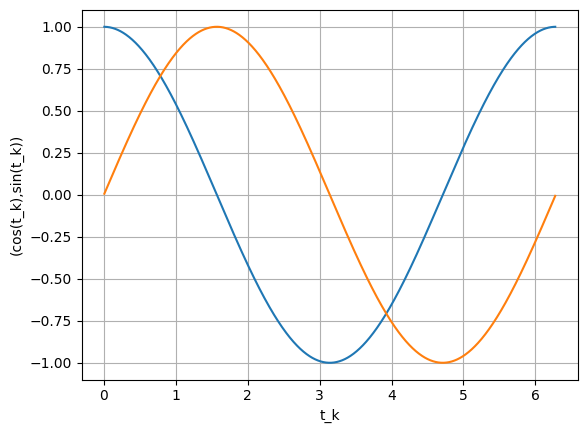

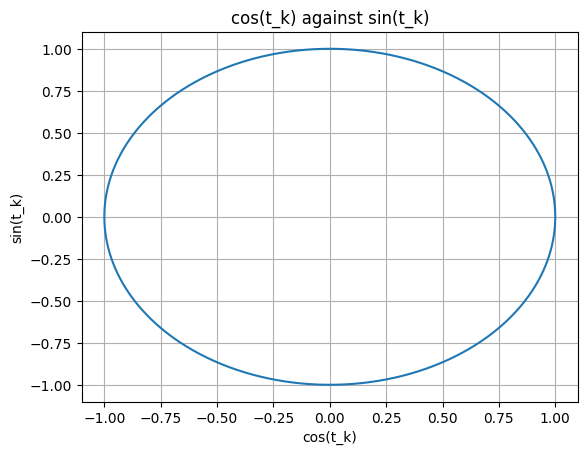

In [3]:
#plot periodic dataset
plot = plot_dataset(x_k,t_k)
#plot.savefig("figures/periodic_dataset.pdf")

In [4]:
#calculate diffusion map L = 4
L = 4
eigenvalues, eigenvectors = diffusion_maps(x_k,L)
#print(lambda_l_periodic)

eigenvalues:
 [0.59850672 0.59919324 0.87956515 0.87965296 1.        ]
eigenvectors:
 [[-0.42310667 -0.00538575  0.42343157  0.00269165  0.29963425]
 [-0.42300715 -0.0107705   0.42340668  0.00538312  0.29963425]
 [-0.4228413  -0.01615328  0.42336521  0.00807423  0.29963425]
 ...
 [-0.4228413   0.01615328  0.42336521 -0.00807423  0.29963425]
 [-0.42300715  0.0107705   0.42340668 -0.00538312  0.29963425]
 [-0.42310667  0.00538575  0.42343157 -0.00269165  0.29963425]]


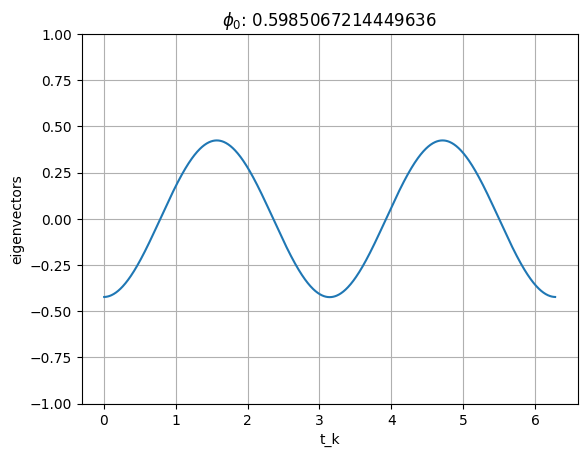

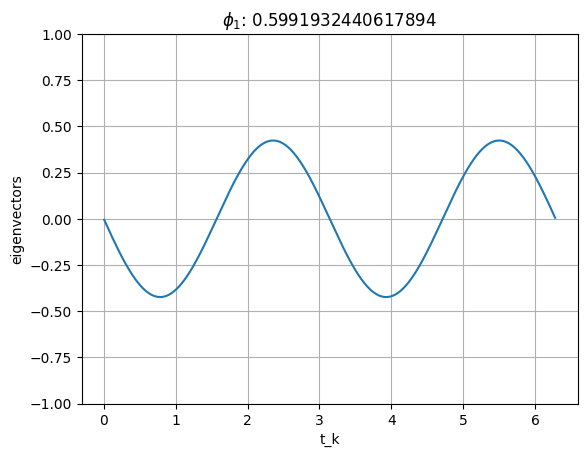

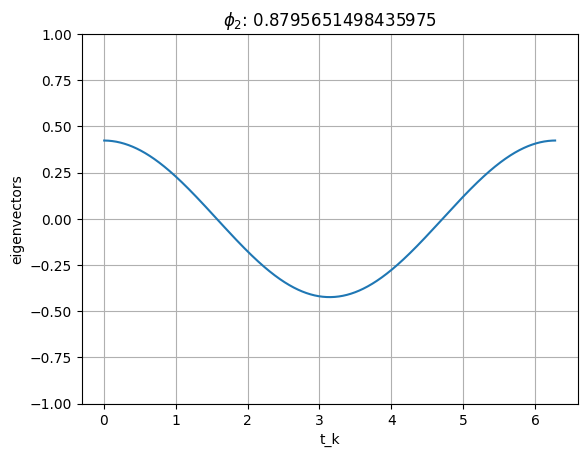

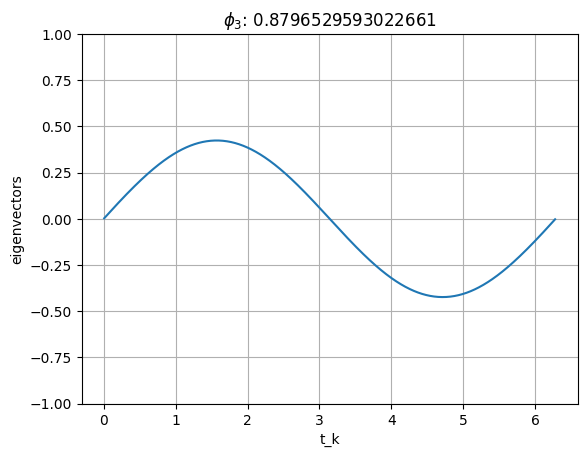

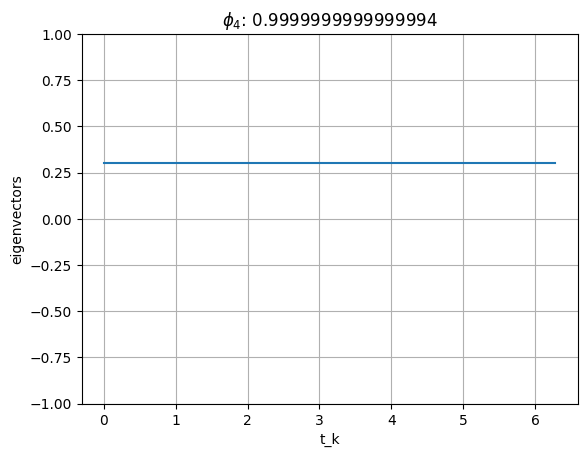

In [5]:
for i in range(L + 1):
    # Create the title using f-string formatting
    title = f"$\phi_{i}$: {eigenvalues[i]}"
    plt.figure()  # Create a new figure for each eigenvector
    plt.title(title)
    plt.plot(t_k, eigenvectors[:, i])
    plt.ylim(-1, 1)
    plt.xlabel('t_k')
    plt.ylabel('eigenvectors')
    plt.grid(True)
    plt.show()

# Part Two: swiss-roll data manifold

eigenvalues:
 [0.99639974 0.99660778 0.99709198 0.99748616 0.99764365 0.99781256
 0.99876548 0.99944853 0.99986367 1.        ]
eigenvectors:
 [[ 0.0412954  -0.06381826 -0.0323604  ... -0.06463089  0.01751537
   0.0522433 ]
 [-0.06268294  0.06444384 -0.04884455 ... -0.05782797 -0.02612648
   0.0522433 ]
 [ 0.03030166 -0.01951837 -0.10451332 ... -0.07376622  0.00342435
   0.0522433 ]
 ...
 [ 0.02574909  0.02959675 -0.05722779 ...  0.05177883  0.06648903
   0.0522433 ]
 [ 0.0798102   0.04377191 -0.00530082 ... -0.01353197  0.04612129
   0.0522433 ]
 [-0.07689674  0.0197278  -0.07757486 ...  0.06839976 -0.07392007
   0.0522433 ]]


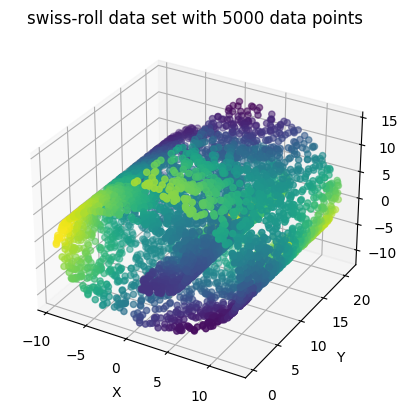

In [12]:
N = 5000  # Number of samples

# Generate swiss-roll dataset with no noise
X,_ = make_swiss_roll(n_samples=N, noise=0, random_state=0)

L = 9  # Number of eigenfunctions
eigenvalues, eigenvectors = diffusion_maps(X, L)

# Create a 3D scatter plot of the swiss-roll dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=eigenvectors[:, 0], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('swiss-roll data set with 5000 data points')
# Save the plot as an image
plt.savefig("./swiss-roll5000")
# Display the plot
plt.show()


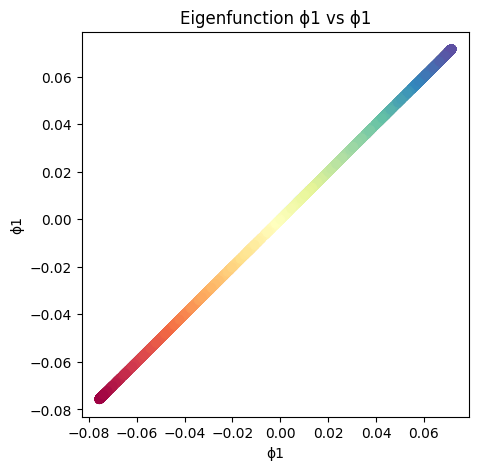

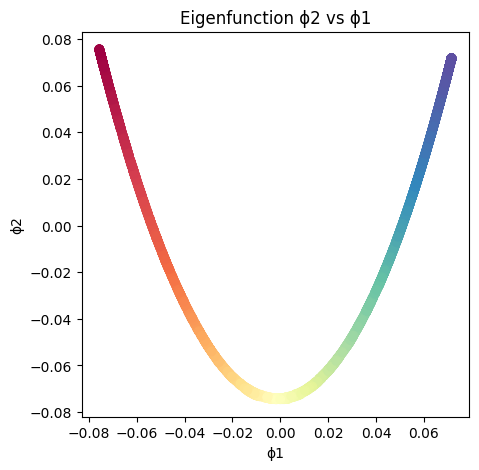

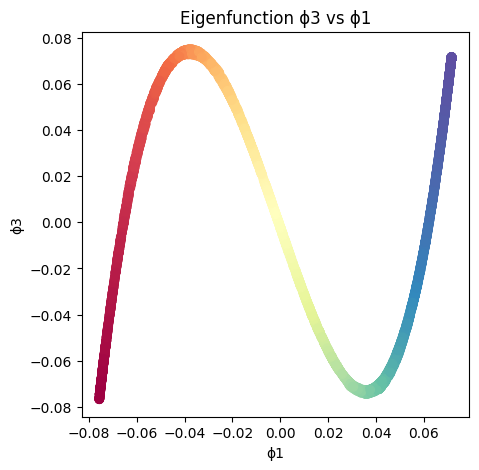

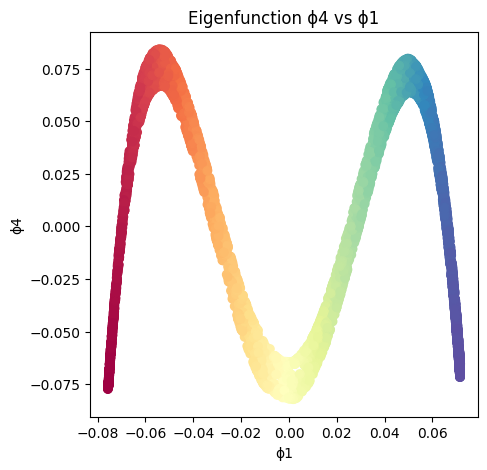

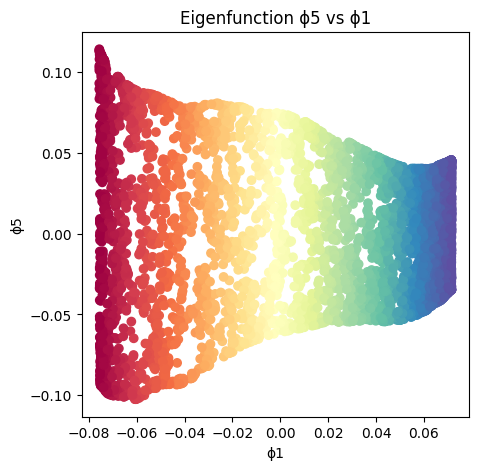

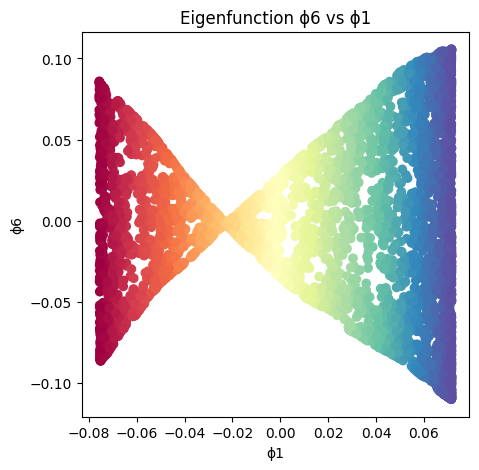

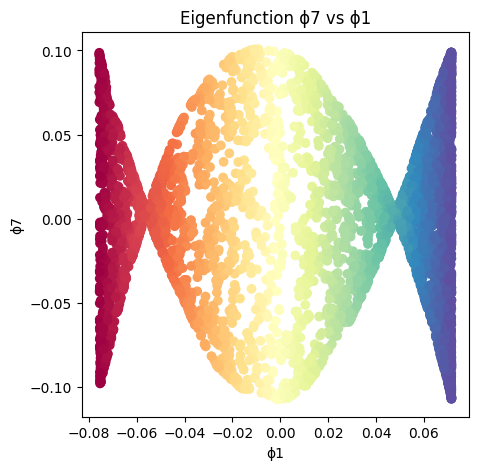

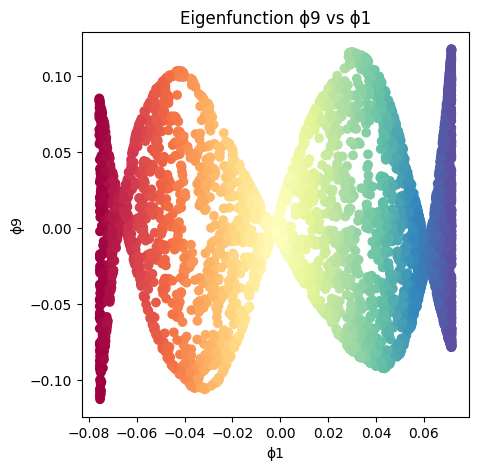

In [13]:
phi_1 = eigenvectors[:, -2]

# Iterate over eigenfunctions
for i in range(1,L+1):
    index =  -1-i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    # Create a scatter plot of eigenfunction Φ_1 versus eigenfunction Φ_i
    ax.scatter(phi_1, eigenvectors[:, index], c=eigenvectors[:, -2], cmap=plt.cm.Spectral)
    ax.set_xlabel("ϕ1")
    ax.set_ylabel(f"ϕ{-(index + 1)}")
    ax.set_title(f"Eigenfunction ϕ{-(index + 1)} vs ϕ1")
    # Save the plot as an image
    plt.savefig(f"./Eigenfunction ϕ{-(index + 1)} vs ϕ1",bbox_inches = 'tight')
    # Display the plot
    plt.show()




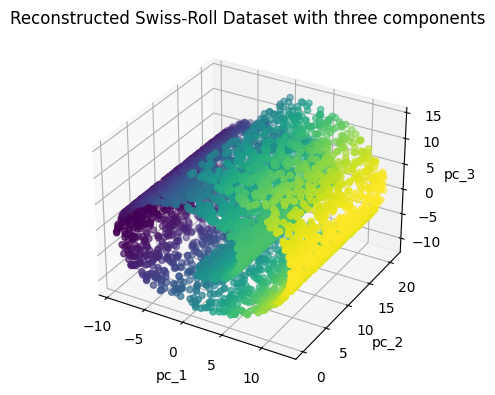

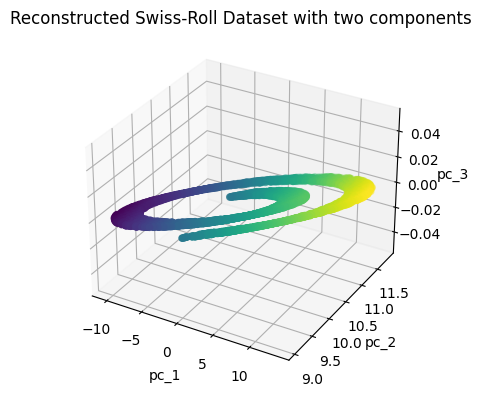

The energy resulting from the given number of principal components is 100.0 %
The energy resulting from the given number of principal components is 61.56832536939775 %


In [8]:
# Perform PCA on the Swiss-Roll dataset
pca_swiss = PCA(X)
u, s, vh = pca_swiss.pca_cal(X)

# Reconstruct the dataset using three principal components
reconstructed_3 = pca_swiss.pca_reconstruction(u, s, vh, r = 3)
pc1 = reconstructed_3[:, 0]
pc2 = reconstructed_3[:, 1]
pc3 = reconstructed_3[:, 2]
# Plot the three principal components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(pc1,pc2,pc3,c=pc1, cmap='viridis')
ax.set_xlabel('pc_1')
ax.set_ylabel('pc_2')
ax.set_zlabel('pc_3')
ax.set_title('Reconstructed Swiss-Roll Dataset with three components')
# Save the plot as an image
plt.savefig(f"./PCA_swiss5000_3",bbox_inches = 'tight')
# Display the plot
plt.show()

# Reconstruct the dataset using two principal components
reconstructed_2 = pca_swiss.pca_reconstruction(u, s, vh, r = 2)
pc_1 = reconstructed_2[:, 0]
pc_2 = reconstructed_2[:, 1]
# Plot the two principal components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(pc_1,pc_2,c=pc_1, cmap='viridis')
ax.set_xlabel('pc_1')
ax.set_ylabel('pc_2')
ax.set_zlabel('pc_3')
ax.set_title('Reconstructed Swiss-Roll Dataset with two components')
# Save the plot as an image
plt.savefig(f"./PCA_swiss5000_2",bbox_inches = 'tight')
# Display the plot
plt.show()

# Calculate the energy of the reconstructed dataset using three and two components
print(pca_swiss.energy_calculation(X, 3))
print(pca_swiss.energy_calculation(X, 2))

In [9]:
# Generate the swiss-roll dataset with 1000 points
N = 1000  # Number of samples
X1, _ = make_swiss_roll(n_samples=N, noise=0, random_state=0)

L1 = 9  # Number of eigenfunctions
eigenvalues, eigenvectors = diffusion_maps(X1, L1)

# Create a 3D scatter plot of the swiss-roll dataset with 1000 points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:, 0], X1[:, 1], X1[:, 2], c=eigenvectors[:, 0], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('swiss-roll data set with 1000 data points')
# Save the plot as an image
plt.savefig(f"./swiss_1000",bbox_inches = 'tight')
# Display the plot
plt.show()



eigenvalues:
 [0.99822073 0.99828535 0.99844821 0.99879036 0.99901612 0.99909286
 0.99938326 0.99974613 0.99994519 1.        ]
eigenvectors:
 [[-0.00588109  0.0067024   0.08344437 ... -0.0517639   0.02886529
   0.05777573]
 [-0.01117531 -0.06802201 -0.03566988 ... -0.10146166 -0.01597954
   0.05777573]
 [-0.02058249  0.06598669  0.10191113 ... -0.07071078  0.01994173
   0.05777573]
 ...
 [-0.00089102 -0.00290063 -0.01389595 ...  0.06643069 -0.08805206
   0.05777573]
 [-0.04549318 -0.04232955  0.00199377 ...  0.04826364  0.06143033
   0.05777573]
 [ 0.02299375 -0.02860854 -0.06184186 ... -0.09641929 -0.01783944
   0.05777573]]


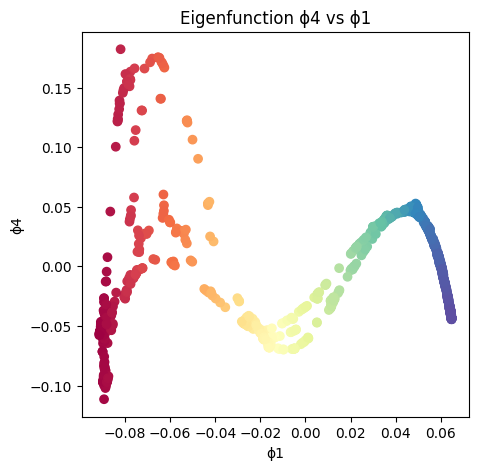

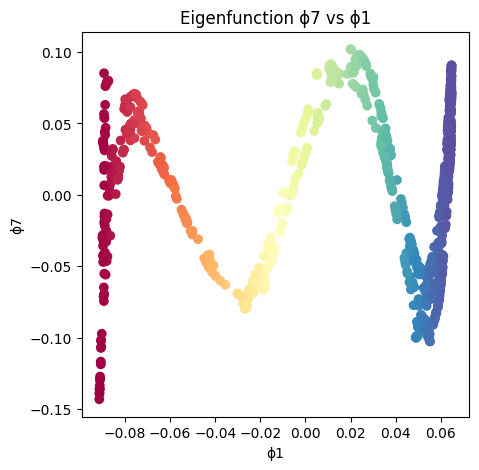

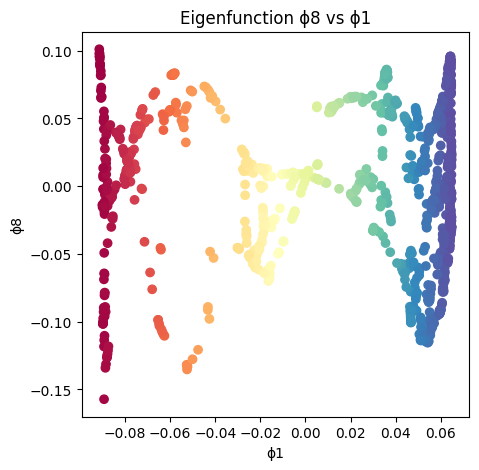

In [10]:
phi_1 = eigenvectors[:, -2]
for i in range(1,L+1):
    index =  -1-i
    # Create a new figure for the plot
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    # Create a scatter plot of eigenfunction Φ_1 versus eigenfunction Φ_i
    ax.scatter(phi_1, eigenvectors[:, index], c=eigenvectors[:, -2], cmap=plt.cm.Spectral)
    ax.set_xlabel("ϕ1")
    ax.set_ylabel(f"ϕ{-(index + 1)}")
    ax.set_title(f"Eigenfunction ϕ{-(index + 1)} vs ϕ1")
    # Save the plot as an image
    plt.savefig(f"./swiss1000_phi{-(index + 1)}",bbox_inches = 'tight')
    # Display the plot
    plt.show()

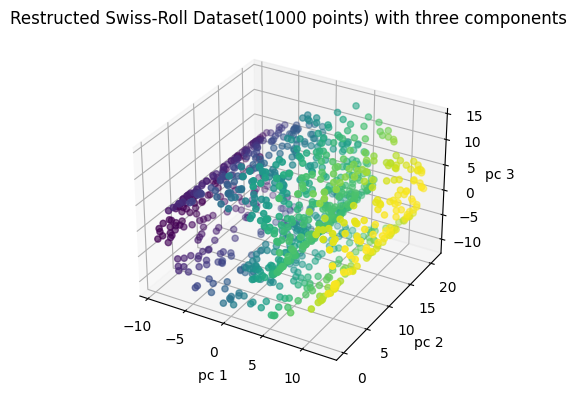

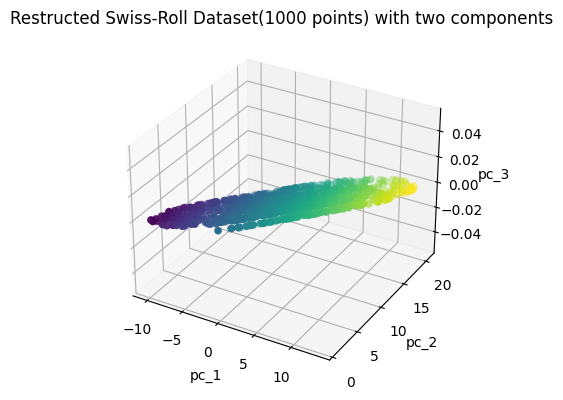

The energy resulting from the given number of principal components is 100.0 %
The energy resulting from the given number of principal components is 51.69263337732194 %


In [11]:
# Generate the swiss-roll dataset with 1000 points
N = 1000  # Number of samples
X1, _ = make_swiss_roll(n_samples=N, noise=0, random_state=0)

# Perform PCA on the Swiss-Roll dataset
pca_swiss = PCA(X1)
u, s, vh = pca_swiss.pca_cal(X1)

# Reconstruct the dataset using three principal components
reconstructed_3 = pca_swiss.pca_reconstruction(u, s, vh, r = 3)
pc_1 = reconstructed_3[:, 0]
pc_2 = reconstructed_3[:, 1]
pc_3 = reconstructed_3[:, 2]
# Plot the three principal components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(pc_1,pc_2,pc_3,c=pc_1, cmap='viridis')
ax.set_xlabel('pc 1')
ax.set_ylabel('pc 2')
ax.set_zlabel('pc 3')
ax.set_title('Restructed Swiss-Roll Dataset(1000 points) with three components')
# Save the plot as an image
plt.savefig(f"./PCA_swiss1000_3",bbox_inches = 'tight')
# Display the plot
plt.show()

# Reconstruct the dataset using two principal components
reconstructed_2 = pca_swiss.pca_reconstruction(u, s, vh, r = 2)
pc_1 = reconstructed_2[:, 0]
pc_2 = reconstructed_2[:, 1]
# Plot the two principal components
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(211, projection='3d')
ax.scatter(pc_1,pc_2,c=pc_1, cmap='viridis')
ax.set_xlabel('pc_1')
ax.set_ylabel('pc_2')
ax.set_zlabel('pc_3')
ax.set_title('Restructed Swiss-Roll Dataset(1000 points) with two components')
# Save the plot as an image
plt.savefig(f"./PCA_swiss1000_2",bbox_inches = 'tight')
plt.show()

# Calculate the energy of the reconstructed dataset using three and two components
print(pca_swiss.energy_calculation(X1, 3))
print(pca_swiss.energy_calculation(X1, 2))

# Part three: data_DMAP_PCA_vadere with Diffusion Maps algorithm

In [14]:
#read the data set and print the shape of it
peds = read_file("data_DMAP_PCA_vadere.txt")
peds.shape

(1000, 30)

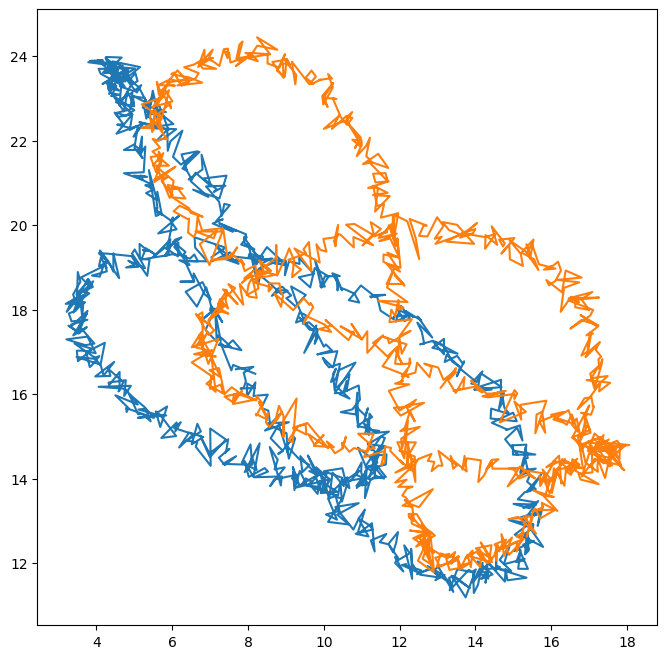

In [15]:
#visualize the data and save it as an image
vis_path(peds)
plt.savefig("./data_vadere")

eigenvalues:
 [0.99889581 0.9993588  0.99938493 0.99971979 0.99972196 0.99992943
 0.99993104 1.        ]
eigenvectors:
 [[ 0.06335143 -0.09889555  0.00754837 ...  0.04038027  0.09097115
  -0.07147667]
 [ 0.06079054 -0.09896943  0.00483257 ...  0.03954697  0.09135252
  -0.07147667]
 [ 0.05913456 -0.09893967  0.0031577  ...  0.03903095  0.09157971
  -0.07147667]
 ...
 [ 0.07012706 -0.0983658   0.01509364 ...  0.04268973  0.08987549
  -0.07147667]
 [ 0.06675331 -0.09870867  0.01125147 ...  0.04151498  0.09044155
  -0.07147667]
 [ 0.06440184 -0.09892622  0.0085984  ...  0.04070415  0.09082996
  -0.07147667]]


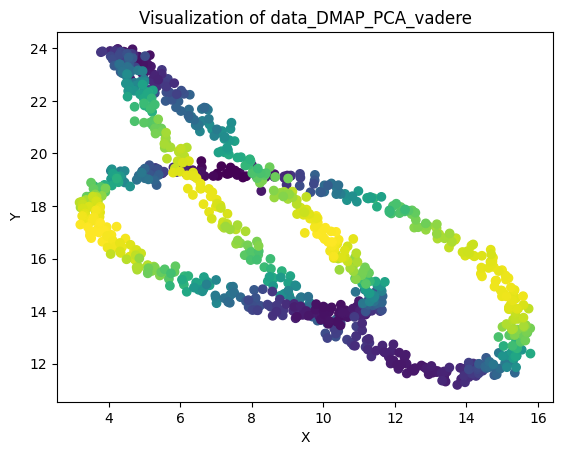

(1000, 8)


In [16]:
L = 7  # Number of eigenfunctions
eigenvalues, eigenvectors = diffusion_maps(peds, L)
fig = plt.figure()
ax = fig.add_subplot(111)
# Create a scatter plot of the data using the first eigenfunction as the color
ax.scatter(peds[:, 0], peds[:, 1], c=eigenvectors[:, 0], cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Visualization of data_DMAP_PCA_vadere')
plt.savefig("./data_vadere_dmap",bbox_inches = 'tight')
plt.show()
# Print the shape of the eigenvectors
print(eigenvectors.shape)

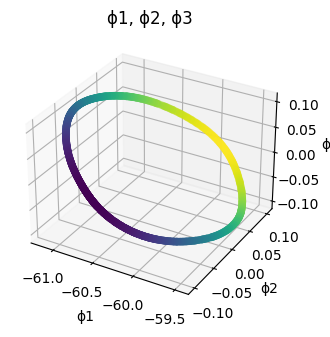

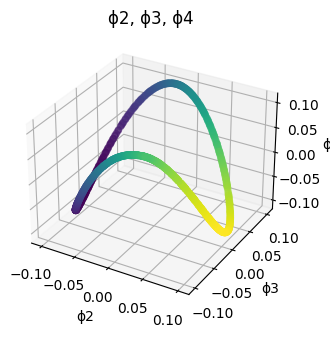

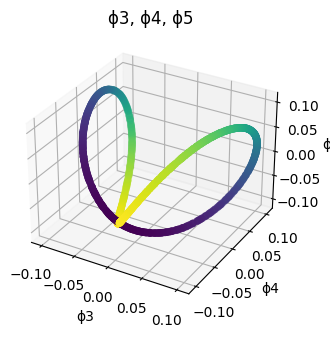

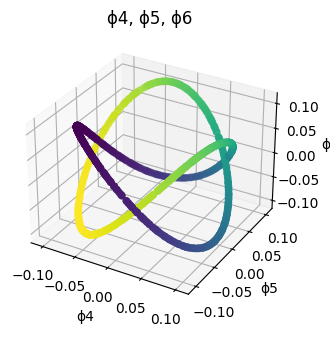

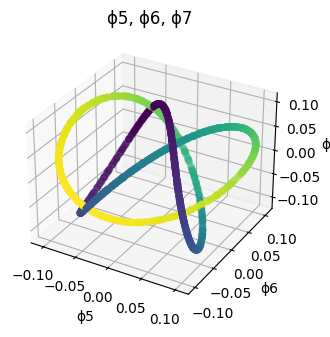

In [25]:
for i in range(1,L-1):
    index =  i
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(211, projection='3d')
    # Create a scatter plot of three consequent eigenfunctions
    ax.scatter(eigenvectors[:,-i], eigenvectors[:, -(i+1)],eigenvectors[:, -(i+2)], c=eigenvectors[:, -2], cmap='viridis')
    ax.set_xlabel(f"ϕ{index}")
    ax.set_ylabel(f"ϕ{(index + 1)}")
    ax.set_zlabel(f"ϕ{(index + 2)}")
    ax.set_title(f"ϕ{(index)}, ϕ{(index + 1)}, ϕ{(index +2)}")
    # Save the plot as an image
    plt.savefig(f"./phi{index}",bbox_inches = 'tight')
    plt.show()

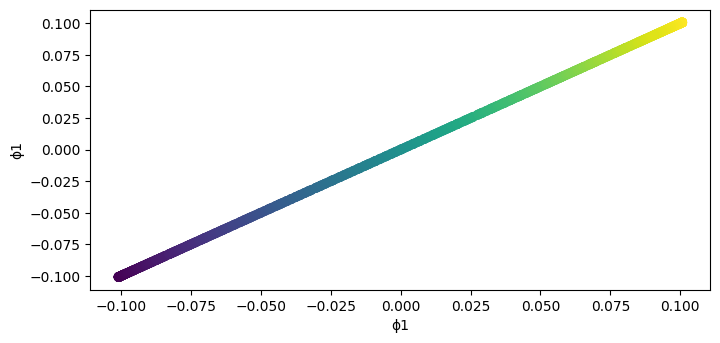

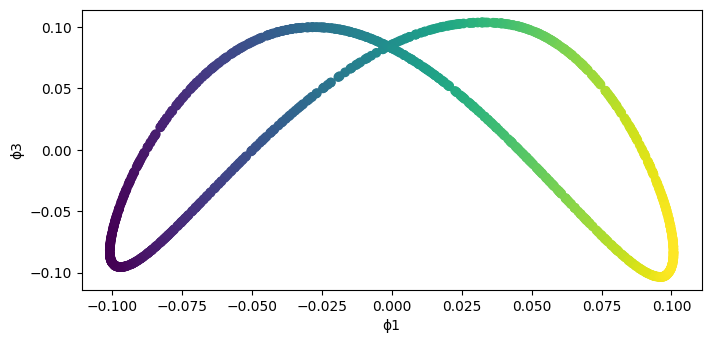

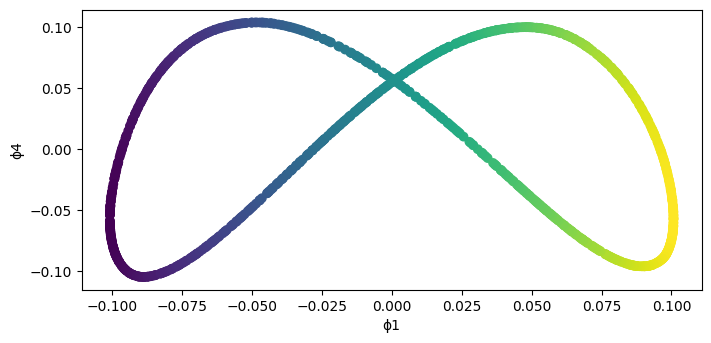

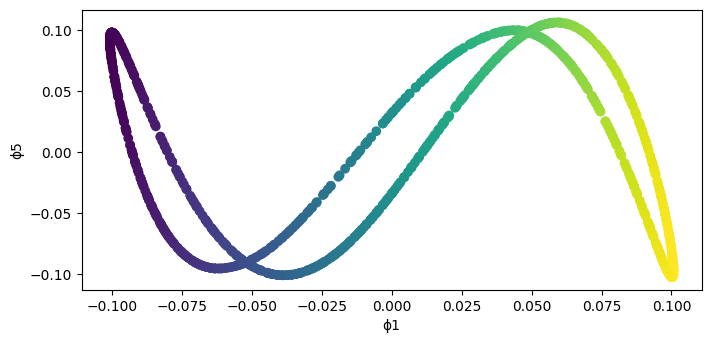

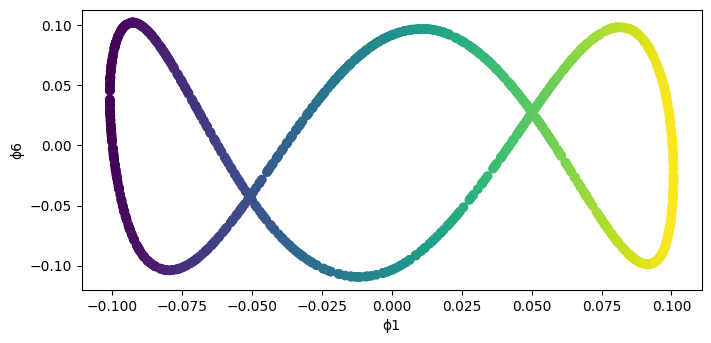

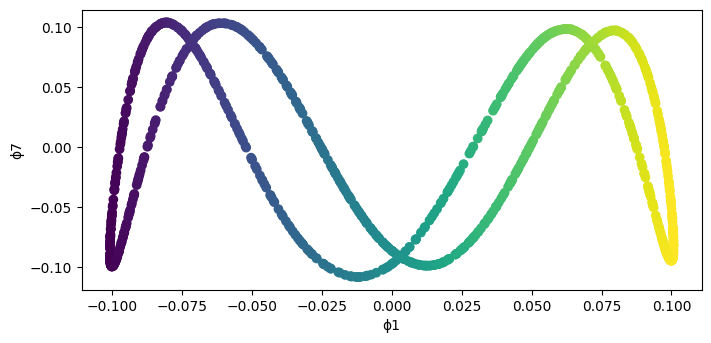

In [26]:
for i in range(1,L+1):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(211)
    # Create a scatter plot of eigenfunctions ϕ_1 and ϕ_i
    ax.scatter(eigenvectors[:,-2], eigenvectors[:, -(i+1)], c=eigenvectors[:, -2], cmap='viridis')
    ax.set_xlabel(f"ϕ{1}")
    ax.set_ylabel(f"ϕ{(i)}")
    # Save the plot as an image
    plt.savefig(f"./phi2{i}",bbox_inches = 'tight')
    # Display the plot
    plt.show()

# Bonus: swiss-roll data with datafold 

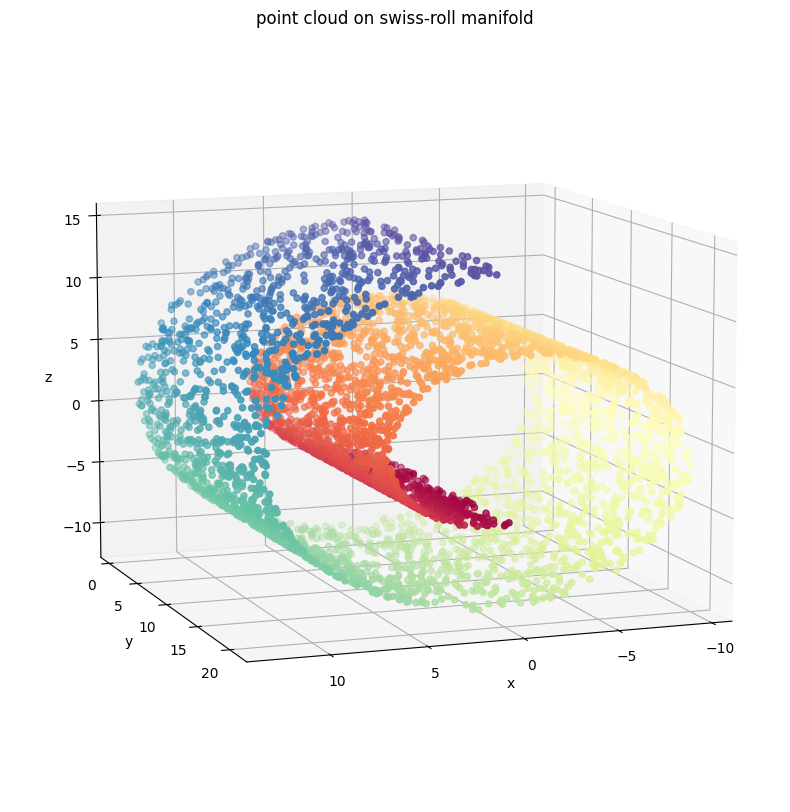

In [20]:
nr_samples = 15000

# reduce number of points for plotting
nr_samples_plot = 5000
idx_plot = np.random.permutation(nr_samples)[0:nr_samples_plot]

# generate point cloud
X, X_color = make_swiss_roll(nr_samples, random_state=3, noise=0)

# plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    X[idx_plot, 0],
    X[idx_plot, 1],
    X[idx_plot, 2],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("point cloud on swiss-roll manifold")
ax.view_init(10, 70)
plt.savefig("./swiss-roll_datafold")

In [21]:
# Create a PCManifold object using the data X
X_pcm = pfold.PCManifold(X)

# Optimize the parameters for the PCManifold
X_pcm.optimize_parameters()

# Print the optimized values for epsilon and cut-off
print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")


epsilon=0.2262991947663703, cut-off=2.041711345759925


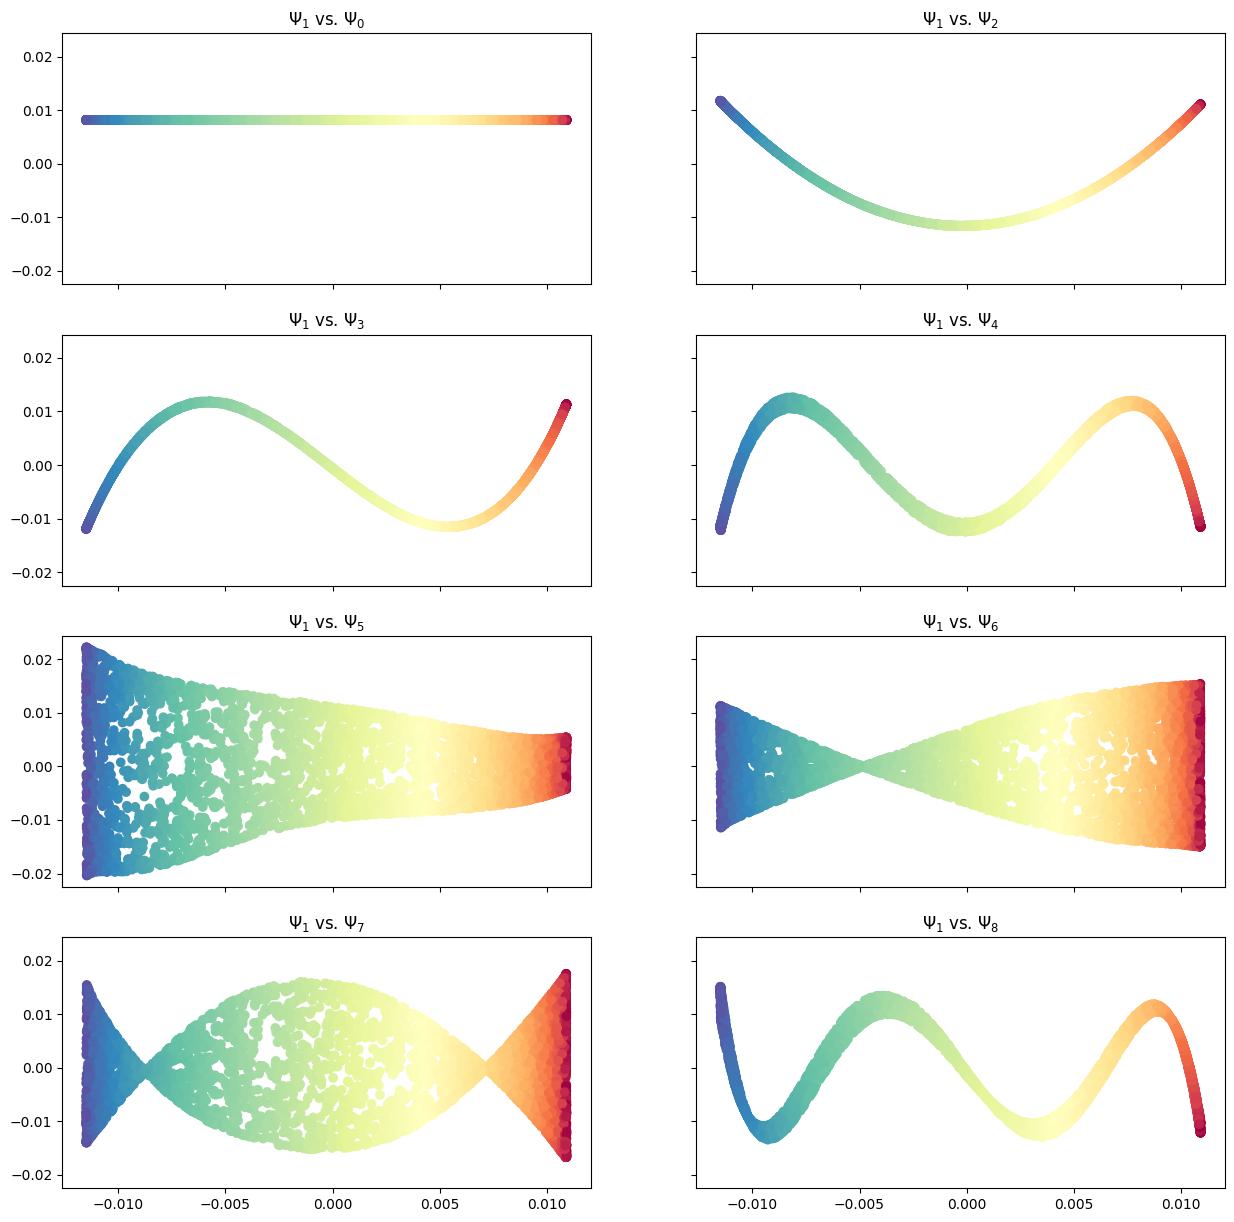

In [22]:
# Create a DiffusionMaps object with the optimized parameters from PCManifold
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=9,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)

# Fit the DiffusionMaps model to the PCManifold
dmap = dmap.fit(X_pcm)

# Get the eigenvectors and eigenvalues from the DiffusionMaps model
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

# Plot the pairwise eigenvectors
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_[idx_plot, :],
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=X_color[idx_plot]),
)
plt.savefig("./swiss-roll_datafold_phi")


In [23]:
# Create a LocalRegressionSelection object with these parameters
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


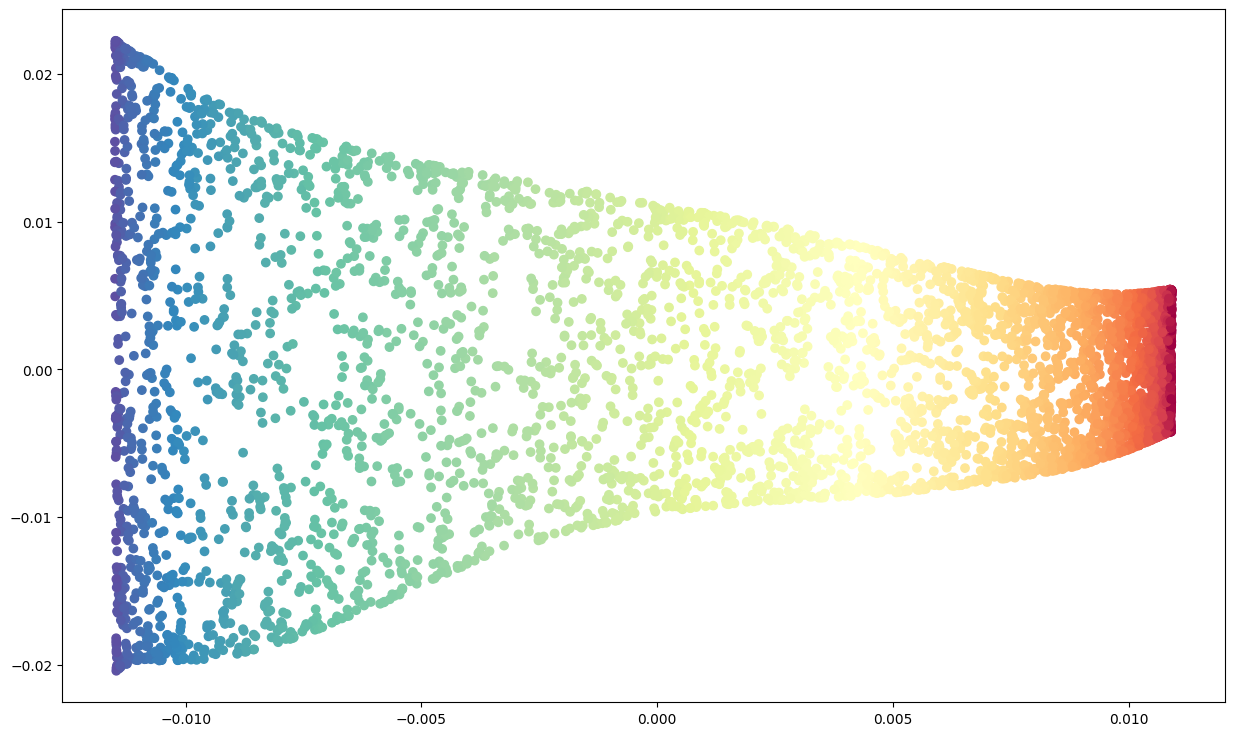

In [24]:
# Transform the eigenvectors using the selected target mapping
target_mapping = selection.transform(dmap.eigenvectors_)

# Create a scatter plot of the transformed target mapping
f, ax = plt.subplots(figsize=(15, 9))
ax.scatter(
    target_mapping[idx_plot, 0],
    target_mapping[idx_plot, 1],
    c=X_color[idx_plot],
    cmap=plt.cm.Spectral,
)
plt.savefig("./swiss-roll_datafold_eigen")
